In [ ]:
## YouTube Data Analysis

    #One billion hours of YouTube content is watched per day
    #YouTube is the 2nd most visited site in the world 
    #YouTube attracts about 44% of all internet users. 37 %


##Types of analysis that we are going to perform in YouTube data

    #Performing Sentiment Analysis
    #Word cloud Analysis of YouTube data
    #Perform Emoji's Analysis
    #Which Category has the maximum likes?
    #Find out whether audience is engaged or not
    #Which channels have the largest number of trending videos?
    #Does Punctuations in title and tags have any relation with views?

In [ ]:
#lets import all the necessary packages !

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
comments=pd.read_csv(r'E:\Project Udemy\Project 1 YouTube\YouTube_Analysis file\UScomments.csv',error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\Taufiqe Ansari\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [7]:
## lets find out missing values in your data
comments.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [8]:
## drop missing values as we have very few & update datafraem as well..
comments.dropna(inplace=True)

In [9]:
comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## 1.performing Sentiment Analysis
    

In [10]:
### lets perform sentiment analysis using TextBlob which is a NLP library built on top of NLTK )..

In [11]:
!pip install textblob

In [12]:
from textblob import TextBlob

In [13]:
TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity

0.0

In [14]:
df=comments[0:1000]

In [20]:
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [21]:
print(polarity[0:7])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [22]:
comments.shape

(691375, 4)

In [17]:
comments.head(3)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   

  replies  
0       0  
1       0  
2       0

In [23]:
comments['polarity']=polarity

In [24]:
comments.head(7)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6  XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0  
5       0       0.0  
6       0       0.0

## 2.. Wordcloud Analysis of youTube data

In [25]:
comments_positive=comments[comments['polarity']==1]

In [26]:
comments_negative=comments[comments['polarity']==-1]

In [27]:
comments_negative.head(2)

video_id                                       comment_text likes  \
512  8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562  8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   

    replies  polarity  
512       0      -1.0  
562       0      -1.0

In [28]:
!pip install wordcloud

In [29]:
from wordcloud import WordCloud , STOPWORDS

In [30]:
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [31]:
total_comments=' '.join(comments_negative["comment_text"])

In [32]:
total_comments[0:500]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!! WTF BRUH!!!!!! cheeseus christ thats insane!!! this is the worst thing i've heard. ever. Economy is horrible in Cuba. It's going to be years before they get out of this. Sub to me if this is terrible PATHETIC I don't like this sportscaster  sounds very annoying commentators are awful T"

(-0.5, 399.5, 199.5, -0.5)

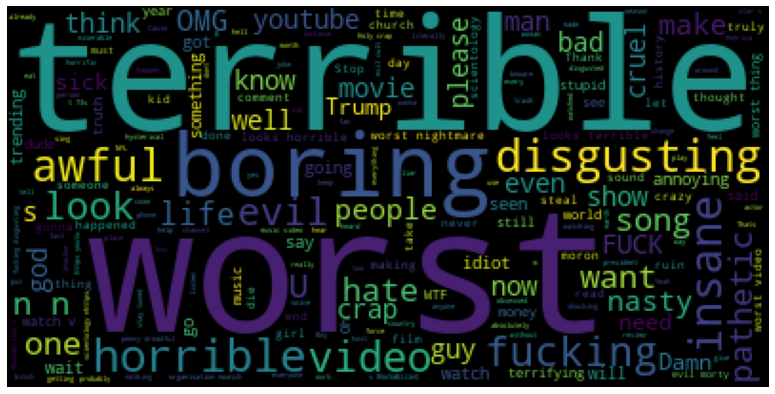

In [33]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize = (19,7))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
### Conclusion-->> Users are emphasizing more on Terrible , worst  ,boring ,horrible, disgusting etc..

In [34]:
total_comments_2 = ' '.join(comments_positive['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

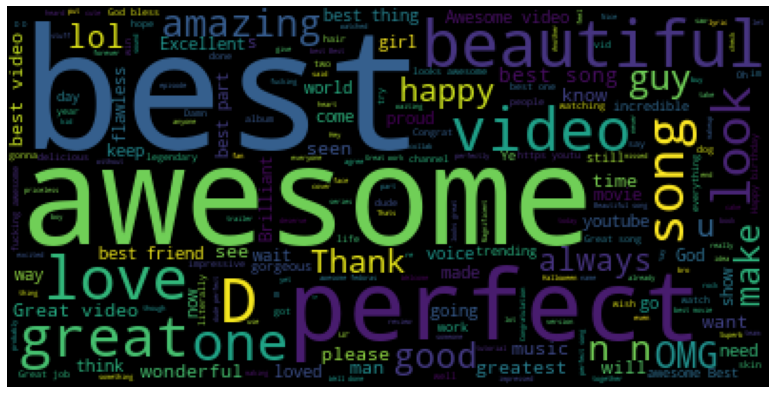

In [35]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_2)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud)
plt.axis('off')

In [36]:
## Conclusion-->> Users are emphasizing more on best, awesome , perfect ,great, beautiful, love etc..

## 3..Perform Emoji's Analysis

In [37]:
!pip install emoji

In [38]:
import emoji

In [39]:
comments.head(7)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6  XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0  
5       0       0.0  
6       0       0.0

In [40]:
# Example

print('\U0001F600')

😀


In [41]:
### lets extract emoji from below comment

In [42]:
comment='The end though 😭👍🏻❤️'

In [43]:
comment

'The end though 😭👍🏻❤️'

In [44]:
emoji_list = []
for c in comment:
    if c in  emoji.UNICODE_EMOJI_ENGLISH:
        emoji_list.append(c)
print(emoji_list)    
 
 

['😭', '👍', '🏻', '❤']


<ipython-input-44-c194fadf4c7c>:3: DeprecationWarning: 'emoji.UNICODE_EMOJI_ENGLISH' is deprecated and will be removed in version 2.0.0. Use 'emoji.EMOJI_DATA' instead.
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  if c in  emoji.UNICODE_EMOJI_ENGLISH:


In [45]:
emoji_list = []
for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.UNICODE_EMOJI_ENGLISH:
            emoji_list.append(char)

<ipython-input-45-c4560403eb67>:4: DeprecationWarning: 'emoji.UNICODE_EMOJI_ENGLISH' is deprecated and will be removed in version 2.0.0. Use 'emoji.EMOJI_DATA' instead.
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  if char in emoji.UNICODE_EMOJI_ENGLISH:


In [46]:
len(emoji_list)

294549

In [48]:
print(emoji_list[:19],end =" ")


['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋', '💙', '👍', '👈', '😂', '🔥', '😂', '😂', '😂', '😂'] 

In [49]:
### NOw we have to compute frequencies of each & every emojis..

In [50]:
from collections import Counter

In [51]:
Counter(emoji_list).most_common(19)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147),
 ('♥', 4909),
 ('😊', 3596),
 ('🏻', 3438),
 ('💜', 3429),
 ('😬', 3381),
 ('👌', 3112),
 ('💙', 2831),
 ('😢', 2672),
 ('🏼', 2549)]

In [52]:
Counter(emoji_list).most_common(19)[0][0] # 0 means first row and second 0 means first column

'😂'

In [53]:
Counter(emoji_list).most_common(19)[3][0]

'🔥'

In [54]:
emojis = [Counter(emoji_list).most_common(19)[i][0] for i in range(19)]

print(emojis, end=' ')

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕', '♥', '😊', '🏻', '💜', '😬', '👌', '💙', '😢', '🏼'] 

In [55]:
frequency = [Counter(emoji_list).most_common(19)[i][1] for i in range(19)]
print(frequency,end=" ")

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147, 4909, 3596, 3438, 3429, 3381, 3112, 2831, 2672, 2549] 

Text(0, 0.5, 'Emojis count')

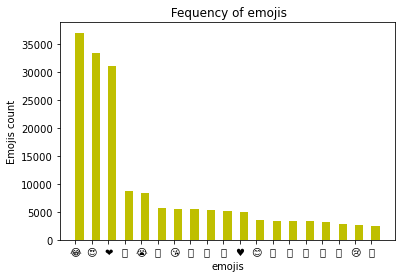

In [61]:
plt.bar(emojis,frequency, width =0.5,align = "edge", color = "y")

plt.title (" Fequency of emojis")
plt.xlabel("emojis")
plt.ylabel("Emojis count")

In [ ]:
# Trying different way to ploat bar graph of frequency and emojis

In [57]:
!pip install plotly

In [58]:
import plotly.graph_objs as go

In [59]:
from plotly.offline import iplot


In [62]:
trace=go.Bar(x=emojis,y=frequency)

In [63]:
iplot([trace])

## 4..Collect Entire data of Youtube !

In [64]:
import os

In [65]:
path=r'E:\Project Udemy\Project 1 YouTube\YouTube_Analysis file\country data'

In [66]:
files=os.listdir(path)

In [67]:
files

['INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [68]:
# Extracting only csv files by using for loop

files_csv=[files[i] for i in range(0,len(files),2)]
files_csv

['INvideos.csv', 'JPvideos.csv', 'KRvideos.csv', 'USvideos.csv']

In [ ]:
# Extracting country name code 

In [69]:
files_csv[0].split('.')[0][0:2]

'IN'

In [70]:
full_df = pd.DataFrame()

for file in files_csv:
    current_df = pd.read_csv(path + '/' + file, encoding = "iso-8859-1",error_bad_lines = False)
    
    current_df['country'] = file.split('.')[0][0:2]
    full_df = pd.concat([full_df,current_df])

In [71]:
full_df.head(7)

video_id trending_date  \
0  kzwfHumJyYc      17.14.11   
1  zUZ1z7FwLc8      17.14.11   
2  10L1hZ9qa58      17.14.11   
3  N1vE8iiEg64      17.14.11   
4  kJzGH0PVQHQ      17.14.11   
5  il_pSa5l98w      17.14.11   
6  7MxiQ4v0EnE      17.14.11   

                                               title    channel_title  \
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...  Lokdhun Punjabi   
1  à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª...          HJ NEWS   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...             TFPC   
3                     Eruma Saani | Tamil vs English      Eruma Saani   
4  why Samantha became EMOTIONAL @ Samantha naga ...       Filmylooks   
5  MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...         Dil Raju   
6  Daang ( Full Video ) | Mankirt Aulakh | Sukh S...    Speed Records   

   category_id              publish_time  \
0            1  2017-11-12T12:20:39.000Z   
1           25  2017-11-13T05:43:56.000Z   
2           24  2017-11-12T15:48:08.000Z   
3           23  2017-11-12T07:08:48.000Z   
4           24  2017-11-13T01:14:16.000Z   
5           24  2017-11-10T04:29:50.000Z   
6           10  2017-11-11T16:41:15.000Z   

                                                tags    views   likes  \
0  sharry mann|"sharry mann new song"|"sharry man...  1096327   33966   
1  à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯|"à¤ª...   590101     735   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988    2011   
3  Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...  1242680   70353   
4  Filmylooks|"latest news"|"telugu movies"|"telu...   464015     492   
5  Nenu Local|"Nenu Local Telugu Movie"|"Nani"|"S...  6106669   98612   
6  punjabi songs|"punjabi bhangra"|"punjabi music...  5718766  127477   

   dislikes  comment_count                                  thumbnail_link  \
0       798            882  https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg   
1       904              0  https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg   
2       243            149  https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg   
3      1624           2684  https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg   
4       293             66  https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg   
5      4185           4763  https://i.ytimg.com/vi/il_pSa5l98w/default.jpg   
6      7134           8063  https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1               True             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   
5              False             False                   False   
6              False             False                   False   

                                         description country  
0  Presenting Sharry Mann latest Punjabi Song  Cu...      IN  
1  à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª...      IN  
2  Watch Stylish Star Allu Arjun @ ChaySam Weddin...      IN  
3  This video showcases the difference between pe...      IN  
4  why Samantha became EMOTIONAL @ Samantha naga ...      IN  
5  Watch MCA- Middle Class Abbayi First Look Teas...      IN  
6  Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...      IN

In [72]:
full_df.shape

(133391, 17)

## 5.. Which Category has the maximum likes ?

In [73]:
full_df['category_id'].unique()

array([ 1, 25, 24, 23, 10, 22, 19, 28, 27, 26, 43, 17, 29,  2, 15, 20, 30,
       44], dtype=int64)

In [74]:
# importing category file

cat=pd.read_csv('E:\Project Udemy\Project 1 YouTube\YouTube_Analysis file\category_file.txt',sep=':')

In [75]:
cat.reset_index(inplace=True)

In [76]:
cat.columns = ['category_id','Category_name']

In [77]:
cat.set_index('category_id',inplace =True)

In [78]:
cat

Category_name
category_id                        
1                  Film & Animation
2                  Autos & Vehicles
10                            Music
15                   Pets & Animals
17                           Sports
18                     Short Movies
19                  Travel & Events
20                           Gaming
21                    Videoblogging
22                   People & Blogs
23                           Comedy
24                    Entertainment
25                  News & Politics
26                    Howto & Style
27                        Education
28             Science & Technology
29            Nonprofits & Activism
30                           Movies
31                  Anime/Animation
32                 Action/Adventure
33                         Classics
34                           Comedy
35                      Documentary
36                            Drama
37                           Family
38                          Foreign
39                           Horror
40                   Sci-Fi/Fantasy
41                         Thriller
42                           Shorts
43                            Shows
44             Trailers

In [79]:
dct = cat.to_dict()
dct["Category_name"]

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [80]:
full_df['Category_name'] = full_df['category_id'].map(dct['Category_name'])

In [81]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'Category_name'],
      dtype='object')

In [82]:
full_df.head(3)

video_id trending_date  \
0  kzwfHumJyYc      17.14.11   
1  zUZ1z7FwLc8      17.14.11   
2  10L1hZ9qa58      17.14.11   

                                               title    channel_title  \
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...  Lokdhun Punjabi   
1  à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª...          HJ NEWS   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...             TFPC   

   category_id              publish_time  \
0            1  2017-11-12T12:20:39.000Z   
1           25  2017-11-13T05:43:56.000Z   
2           24  2017-11-12T15:48:08.000Z   

                                                tags    views  likes  \
0  sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
1  à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯|"à¤ª...   590101    735   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   

   dislikes  comment_count                                  thumbnail_link  \
0       798            882  https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg   
1       904              0  https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg   
2       243            149  https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1               True             False                   False   
2              False             False                   False   

                                         description country  \
0  Presenting Sharry Mann latest Punjabi Song  Cu...      IN   
1  à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª...      IN   
2  Watch Stylish Star Allu Arjun @ ChaySam Weddin...      IN   

       Category_name  
0   Film & Animation  
1    News & Politics  
2      Entertainment

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Film & Animation'),
  Text(1, 0, ' News & Politics'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' Comedy'),
  Text(4, 0, ' Music'),
  Text(5, 0, ' People & Blogs'),
  Text(6, 0, ' Travel & Events'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Education'),
  Text(9, 0, ' Howto & Style'),
  Text(10, 0, ' Shows'),
  Text(11, 0, ' Sports'),
  Text(12, 0, ' Nonprofits & Activism'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Pets & Animals'),
  Text(15, 0, ' Gaming'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

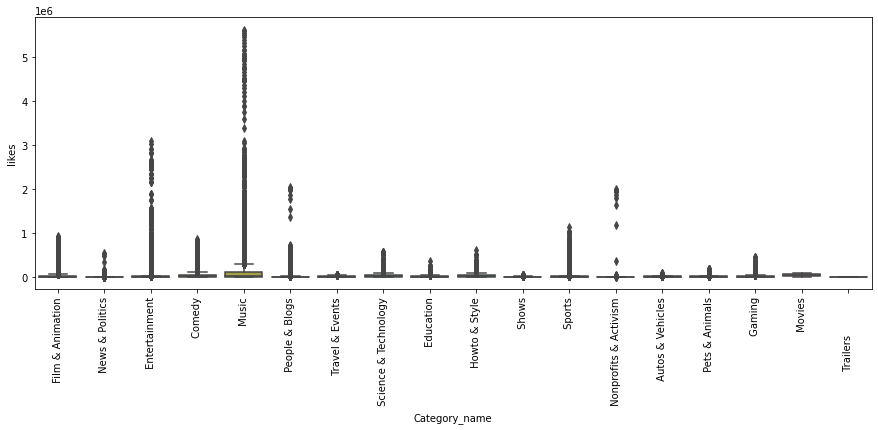

In [83]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'Category_name',y = 'likes',data=full_df)
plt.xticks(rotation ='vertical')

## 6.. Find out whether audience is engaged or not

In [84]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'Category_name'],
      dtype='object')

In [85]:
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [86]:
full_df.head(3)

video_id trending_date  \
0  kzwfHumJyYc      17.14.11   
1  zUZ1z7FwLc8      17.14.11   
2  10L1hZ9qa58      17.14.11   

                                               title    channel_title  \
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...  Lokdhun Punjabi   
1  à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª...          HJ NEWS   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...             TFPC   

   category_id              publish_time  \
0            1  2017-11-12T12:20:39.000Z   
1           25  2017-11-13T05:43:56.000Z   
2           24  2017-11-12T15:48:08.000Z   

                                                tags    views  likes  \
0  sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
1  à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯|"à¤ª...   590101    735   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   

   dislikes  ...                                  thumbnail_link  \
0       798  ...  https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg   
1       904  ...  https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg   
2       243  ...  https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1              True             False                   False   
2             False             False                   False   

                                         description country  \
0  Presenting Sharry Mann latest Punjabi Song  Cu...      IN   
1  à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª...      IN   
2  Watch Stylish Star Allu Arjun @ ChaySam Weddin...      IN   

       Category_name like_rate  dislike_rate  comment_count_rate  
0   Film & Animation  3.098163      0.072789            0.080450  
1    News & Politics  0.124555      0.153194            0.000000  
2      Entertainment  0.424272      0.051267            0.031435  

[3 rows x 21 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Film & Animation'),
  Text(1, 0, ' News & Politics'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' Comedy'),
  Text(4, 0, ' Music'),
  Text(5, 0, ' People & Blogs'),
  Text(6, 0, ' Travel & Events'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Education'),
  Text(9, 0, ' Howto & Style'),
  Text(10, 0, ' Shows'),
  Text(11, 0, ' Sports'),
  Text(12, 0, ' Nonprofits & Activism'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Pets & Animals'),
  Text(15, 0, ' Gaming'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

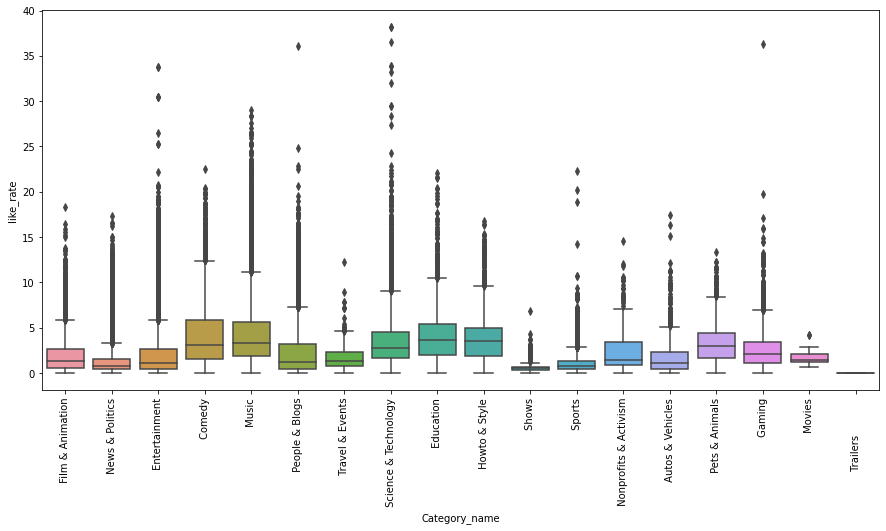

In [88]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Category_name',y='like_rate',data=full_df)
plt.xticks(rotation='vertical')

In [89]:
### analysing relationship between views & likes

<AxesSubplot:xlabel='views', ylabel='likes'>

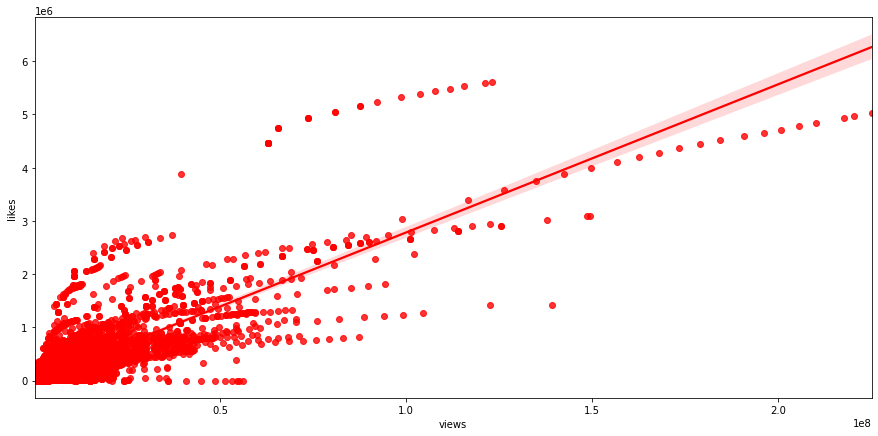

In [91]:
plt.figure(figsize = (15,7))
sns.regplot(data = full_df,x = 'views', y = 'likes',color = "red")

In [92]:
#Let's start Looking at correlation
### finding co-relation values between ['views', 'likes', 'dislikes']

full_df[['views','likes','dislikes']].corr() # methods = pearson, kendall,spearman

views     likes  dislikes
views     1.000000  0.842653  0.494476
likes     0.842653  1.000000  0.450584
dislikes  0.494476  0.450584  1.000000

<AxesSubplot:>

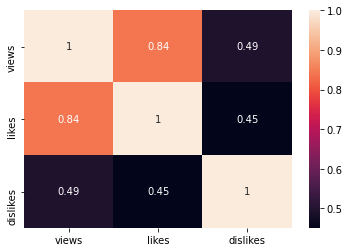

In [93]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(),annot=True)

In [ ]:
full_df.head(3)

Text(0, 0.5, 'likes')

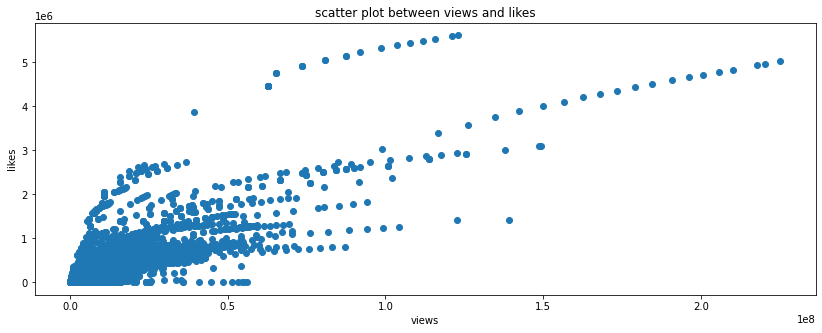

In [96]:
# Scatterplot between 'views' & 'likes 

plt.figure(figsize=(14,5))
plt.scatter(x =full_df['views'], y =full_df['likes'])

plt.title('scatter plot between views and likes')
plt.xlabel('views')
plt.ylabel('likes')

## 7.Which channels have the largest number of trending videos?

In [97]:
cdf=full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})

In [98]:
cdf

channel_title  total_videos
0                     The Late Show with Stephen Colbert           322
1                                              VikatanTV           284
2                                         etvteluguindia           282
3                                                    WWE           278
4                                         Flowers Comedy           270
...                                                  ...           ...
11729                                          TV ê¿ì¼             1
11730                                    TV ì¸ì ì±ë             1
11731                      ë² ì§±ì´ìí° son doo seong             1
11732  ä»®æ³éè²¨ã¯ä»ããããã!ãä»®æ³é...             1
11733                           ãªãã®ã²ã¨æ¾éå±             1

[11734 rows x 2 columns]

In [99]:
import plotly.express as px

In [102]:
px.bar(data_frame=cdf[0:20],x='channel_title',y='total_videos')


    #Create Above Bar chart using  Matplotlib 

In [114]:
#Top 20 channels vedio

data_frame =cdf[0:20]

In [112]:
channel = data_frame.channel_title


In [113]:
videos = data_frame.total_videos


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

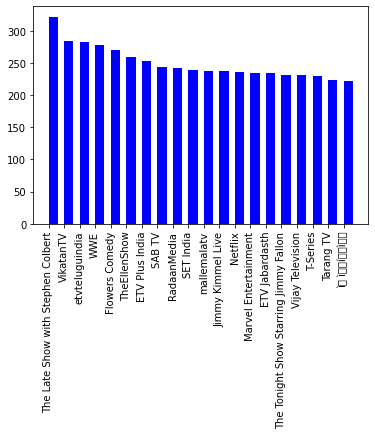

In [115]:
plt.bar(channel,videos, width =0.6,align = "edge", color = "blue")
plt.xticks(rotation='vertical')

## 8..Does Punctuations in title and tags have any relation with views, likes, dislikes comments?

In [116]:
import string

In [117]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [118]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])
    

In [ ]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

In [121]:
full_df['title'][2]

2    Stylish Star Allu Arjun @ ChaySam Wedding Rece...
2                                Live Views of Starman
2    ëëª°ë¼í¨ë°ë¦¬ ì´ëí ìì 2í (ë¹¼ë...
2    Racist Superman | Rudy Mancuso, King Bach & Le...
Name: title, dtype: object

In [124]:
# how many punctuation in this text
text='Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [125]:
punc_count(text)

4

In [127]:
sample=full_df[0:10000]

In [136]:
sample['count_punc'] =  sample['title'].apply(punc_count)

<ipython-input-136-406f1ff8b8a2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [137]:
sample.head()

video_id trending_date  \
0  kzwfHumJyYc      17.14.11   
1  zUZ1z7FwLc8      17.14.11   
2  10L1hZ9qa58      17.14.11   
3  N1vE8iiEg64      17.14.11   
4  kJzGH0PVQHQ      17.14.11   

                                               title    channel_title  \
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...  Lokdhun Punjabi   
1  à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª...          HJ NEWS   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...             TFPC   
3                     Eruma Saani | Tamil vs English      Eruma Saani   
4  why Samantha became EMOTIONAL @ Samantha naga ...       Filmylooks   

   category_id              publish_time  \
0            1  2017-11-12T12:20:39.000Z   
1           25  2017-11-13T05:43:56.000Z   
2           24  2017-11-12T15:48:08.000Z   
3           23  2017-11-12T07:08:48.000Z   
4           24  2017-11-13T01:14:16.000Z   

                                                tags    views  likes  \
0  sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
1  à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯|"à¤ª...   590101    735   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   
3  Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...  1242680  70353   
4  Filmylooks|"latest news"|"telugu movies"|"telu...   464015    492   

   dislikes  ...  ratings_disabled video_error_or_removed  \
0       798  ...             False                  False   
1       904  ...             False                  False   
2       243  ...             False                  False   
3      1624  ...             False                  False   
4       293  ...             False                  False   

                                         description  country  \
0  Presenting Sharry Mann latest Punjabi Song  Cu...       IN   
1  à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª...       IN   
2  Watch Stylish Star Allu Arjun @ ChaySam Weddin...       IN   
3  This video showcases the difference between pe...       IN   
4  why Samantha became EMOTIONAL @ Samantha naga ...       IN   

       Category_name like_rate dislike_rate comment_count_rate  count  \
0   Film & Animation  3.098163     0.072789           0.080450      5   
1    News & Politics  0.124555     0.153194           0.000000      2   
2      Entertainment  0.424272     0.051267           0.031435      2   
3             Comedy  5.661393     0.130685           0.215985      1   
4      Entertainment  0.106031     0.063145           0.014224      2   

   count_punc  
0           5  
1           2  
2           2  
3           1  
4           2  

[5 rows x 23 columns]

<AxesSubplot:xlabel='count_punc', ylabel='views'>

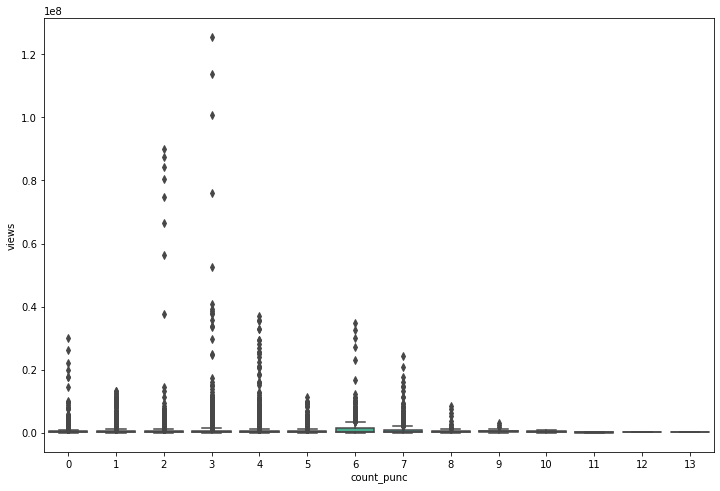

In [138]:
plt.figure(figsize=(12,8))
sns.boxplot(x='count_punc',y='views',data=sample)

In [ ]:
# conclusion thorugh box plot if punctuation 3 have high number of views

In [139]:
sample['count_punc'].corr(sample['views'])

0.034334856335723536

In [ ]:
#Conclusion correlation value of sample is 0.034 means if increase the number of puntuation views is vey less 